## Global Power Plant Database
### Problem Statement:
#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


#### Import Necessary Laibraries

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### Loading Database


In [290]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df.shape

(907, 27)

Dataset has 907 rows and 27 columns.

In [292]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [293]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Count of columns are not at all equal so there are are missing values.

The columns other_fuel3,wepp_id and estimated_generation_gwh are having count as zero.

There is larger deviation between the column values so scaling need to be use.

In [294]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

### Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the 

`source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [295]:
df.select_dtypes(['object']).head(3)

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN


### Data cleaning

<AxesSubplot:>

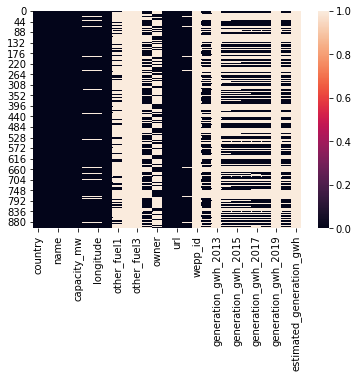

In [296]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

### Conclusion:

The above graph is here to show that if there are any null values in the above dataset, I have found out that the white line shows the '1' value here, it means that dataset has the empty(Null Values).

In [297]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

The columns other_fuel3,other_fuel2,wepp_id, generation_gwh_2013,generation_gwh_2019 and estimated_generation_gwh contains all the rows empty so it needs to be removed.
There are so many missing values in the dataset.

In [298]:
df = df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis='columns')

In [299]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [301]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [302]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [303]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In other_fuel1 column aprox 80% data is NAN 

In country column there is same data in all rows 

In country_long column there is same data in all rows

now we drop these columns in our data set



In [304]:
df1 = df.drop(['country','country_long','other_fuel1'],axis='columns')

### Treating Null Values

In [305]:
df1.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [306]:
df1['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [307]:
df1['owner'].value_counts()

Acc Acc ltd                          4
Sterling Agro Industries ltd.        4
Jk Cement ltd                        4
Government of India                  3
SWPPL                                3
                                    ..
Ashok Ssk ltd                        1
Jawahar Ssk ltd                      1
Riddhi Siddhi Gluco Biols Limited    1
Sepset Construction Limited          1
Kjs Ahluwalia group                  1
Name: owner, Length: 280, dtype: int64

In [308]:
df1['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [309]:
df1['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [310]:
df1['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [311]:
df1['latitude'].value_counts()

24.1917    3
19.0004    3
15.2615    2
13.2450    2
11.5336    2
          ..
16.4994    1
9.0870     1
20.9099    1
17.2387    1
16.5973    1
Name: latitude, Length: 836, dtype: int64

In [312]:
df1['longitude'].value_counts()

71.6917    4
72.8983    3
81.2875    3
75.8988    3
71.6918    3
          ..
77.9576    1
91.8114    1
80.1264    1
76.1137    1
79.5748    1
Name: longitude, Length: 827, dtype: int64

In [313]:
df1['generation_gwh_2014'].value_counts()

0.00000       28
6803.31250     1
4735.13000     1
145.81400      1
2022.57000     1
              ..
6224.00000     1
268.48085      1
1255.73200     1
164.32425      1
1153.65300     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [314]:
df1['generation_gwh_2015'].value_counts()

0.00000       27
174.17475      1
8076.81050     1
1.09395        1
18.71595       1
              ..
665.19730      1
1516.36010     1
741.86205      1
183.29890      1
7130.50700     1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [315]:
df1['generation_gwh_2016'].value_counts()

0.00000       30
8470.57000     2
1511.00000     2
250.97100      1
7.31325        1
              ..
433.84800      1
283.74811      1
259.94375      1
403.96000      1
307.87290      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [316]:
df1['generation_gwh_2017'].value_counts()

0.00000       32
170.08530      2
9271.00000     1
59.43135       1
549.86930      1
              ..
214.48220      1
272.73945      1
2887.00000     1
12.73600       1
158.73235      1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [317]:
df1['generation_gwh_2018'].value_counts()

0.00000       39
100.85320      1
805.48235      1
7179.00000     1
6915.39000     1
              ..
980.25410      1
33.88970       1
6474.61425     1
347.34455      1
192.01510      1
Name: generation_gwh_2018, Length: 410, dtype: int64

In [318]:
df1['latitude'] = df1['latitude'].fillna(df1['latitude'].mean())
df1['longitude'] = df1['longitude'].fillna(df1['longitude'].mean())
df1['generation_gwh_2014'] = df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mean())
df1['generation_gwh_2015'] = df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mean())
df1['generation_gwh_2016'] = df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].mean())
df1['generation_gwh_2017'] = df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mean())
df1['generation_gwh_2018'] = df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].mean())



In [319]:
df1['commissioning_year'] = df1['commissioning_year'].fillna(0)
df1['year_of_capacity_data'] = df1['year_of_capacity_data'].fillna(0)

In [320]:
df1['owner'] = df1['owner'].fillna(df1['owner'].mode()[0])
df1['geolocation_source'] = df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0])
df1['generation_data_source'] = df1['generation_data_source'].fillna(df1['generation_data_source'].mode()[0])


In [321]:
df1.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now we can see that there are no missing values in the dataset

### Data Exploration(EDA)

In [322]:
df1['generation_data_source'].unique()

array(['Central Electricity Authority'], dtype=object)

In [323]:
#genration data source contain same value for all field so wont be useful in predicting the fuel type or capacity gwh
df1.drop(['generation_data_source'],axis=1,inplace=True)

In [324]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [325]:
df1['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [326]:
#Since it contain 908 text values different for all the columns so it was unecessary feature.
df1.drop(['name'],axis=1,inplace=True)
df1.drop(['gppd_idnr'],axis=1,inplace=True)

In [327]:
df1['year_of_capacity_data'].unique()

array([   0., 2019.])

In [328]:
# year_of_capacity_data not contain much information
df1.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [329]:
df1.shape

(907, 14)

In [330]:
df1.head(20)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.183900,73.240700,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.00,24.766300,74.609000,Coal,0.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.20,21.903800,69.373200,Wind,0.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.00,23.871200,91.360200,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.00,21.960300,82.409100,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.00,23.768900,68.644700,Coal,2005.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.00,10.454700,77.007800,Hydro,1970.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.00,32.225800,77.207000,Hydro,2010.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.00,16.330000,75.886300,Hydro,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.00,23.164200,81.637300,Coal,2008.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


Coal       0.284454
Hydro      0.276736
Solar      0.140022
Wind       0.135612
Gas        0.076075
Biomass    0.055127
Oil        0.022051
Nuclear    0.009923
Name: primary_fuel, dtype: float64

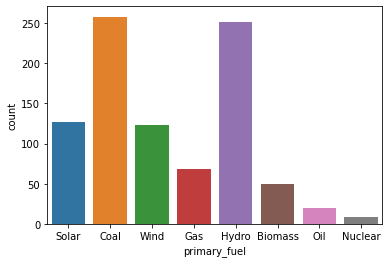

In [331]:
# Visualizing the target variables
sn.countplot(df1['primary_fuel'])
df1['primary_fuel'].value_counts(normalize=True)

The primary fuel Coal and Hydro are showing highest count among all the fuel types and nuclear fuel type shows least count.



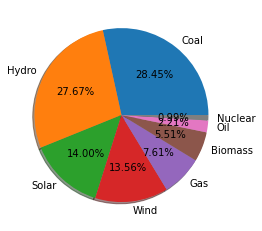

In [332]:
# Pie chart for class variable
labels='Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig,ax=plt.subplots()
ax.pie(df1['primary_fuel'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can see that the Coal and Hydro consititutes about 56 percentage of total fuel type.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

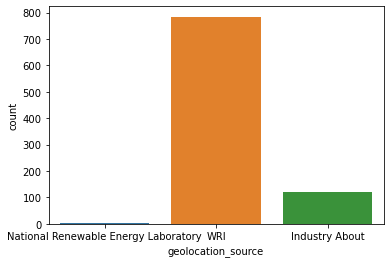

In [333]:
sn.countplot(df1['geolocation_source'])
df1['geolocation_source'].value_counts()

The maximum count of gelocation source can be seen from WRI and least from national renewable energy

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

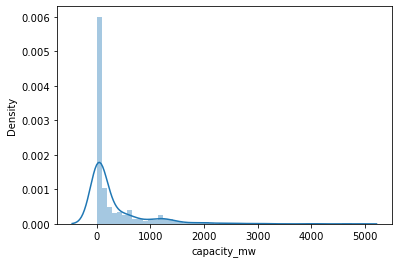

In [334]:
# Target varible
sn.distplot(df1['capacity_mw'])

The distribution plot shows that the data seem to be right skewed

<AxesSubplot:xlabel='latitude', ylabel='Density'>

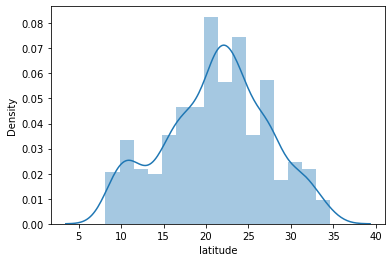

In [335]:
sn.distplot(df1['latitude'])

The distribution plot for latitude is normally distributed

<AxesSubplot:xlabel='longitude', ylabel='Density'>

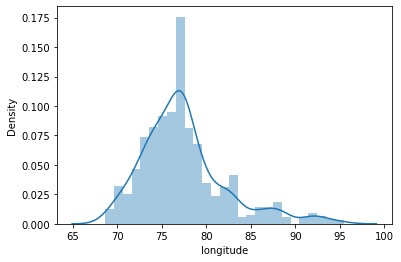

In [336]:
sns.distplot(df1['longitude'])

 Skewness can be observed from above distribution plot ,it can be removed by using log or power transformation method.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

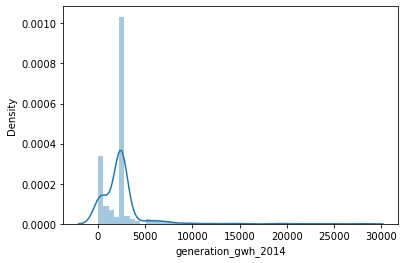

In [337]:
# genration gwh_2014
sn.distplot(df1['generation_gwh_2014'])

Data is highly skewed to the right ,we will need to use transformation method.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

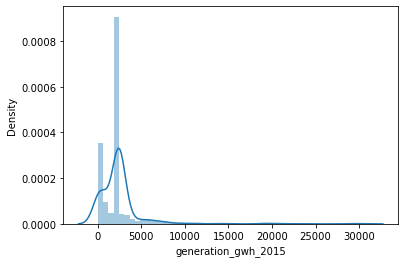

In [338]:
# genration gwh_2015
sn.distplot(df1['generation_gwh_2015'])

Data is highly skewed to the right ,we will need to use transformation method.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

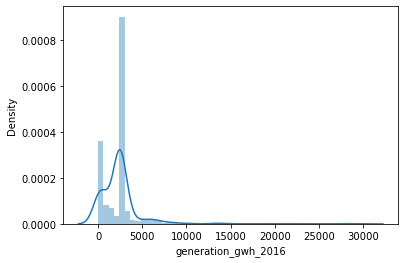

In [339]:
# genration gwh_2016
sn.distplot(df1['generation_gwh_2016'])

Data is highly skewed to the right ,we will need to use transformation method.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

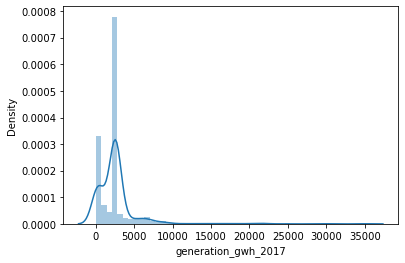

In [340]:
# genration gwh_2017
sn.distplot(df1['generation_gwh_2017'])

Data is highly skewed to the right ,we will need to use transformation method.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

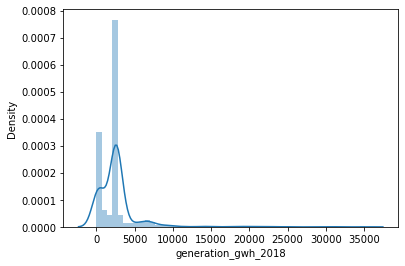

In [341]:
# genration gwh_2018
sn.distplot(df1['generation_gwh_2018'])

Data is highly skewed to the right ,we will need to use transformation method.

### Checking Outliers

In [342]:
numerical=list(df1.select_dtypes(['float64']))

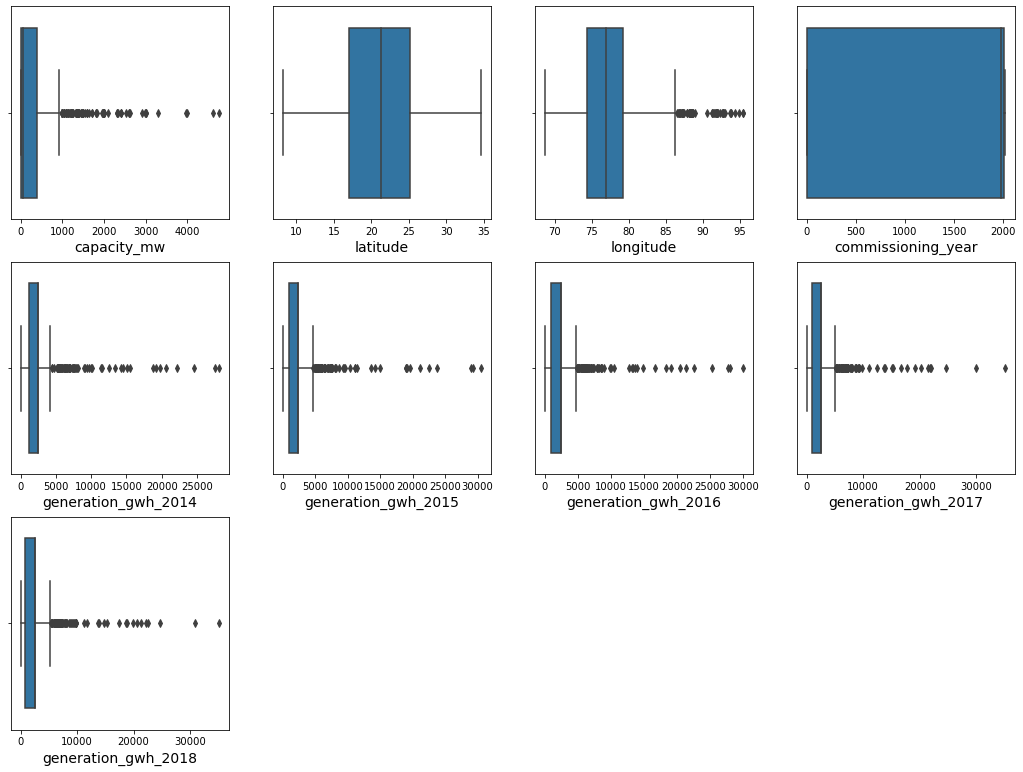

In [343]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in df1[numerical]:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sn.boxplot(df1[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

We can see that all the columns contains the many outliers so it can be removed using zscore.
Latitude column does not contain any outliers.

### Bivariate Anaysis

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

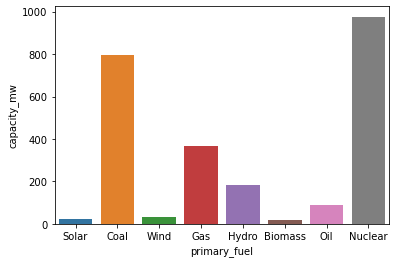

In [344]:
sn.barplot(x="primary_fuel", y="capacity_mw", data=df1,ci=None)

It can be clearly seen that nuclear power plant needs largest electrical capacity(megawatts) followed by Coal plant.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

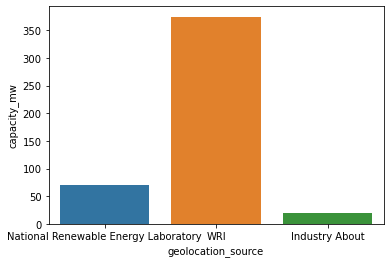

In [345]:
sn.barplot(x="geolocation_source", y="capacity_mw", data=df1,ci=None)

Laboratory WRI requires highest electrical capacity(megawatts) in comparison with others.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

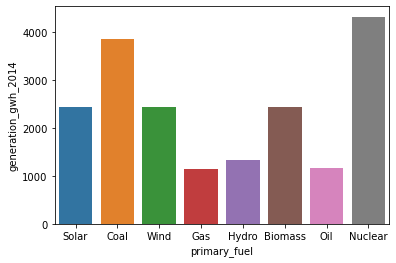

In [346]:
sn.barplot(x="primary_fuel", y="generation_gwh_2014", data=df1,ci=None)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

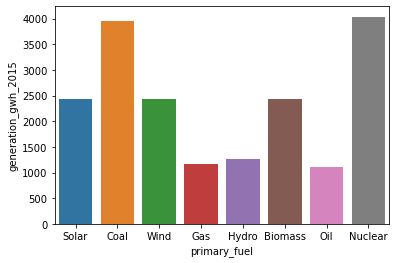

In [347]:
sn.barplot(x="primary_fuel", y="generation_gwh_2015", data=df1,ci=None)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

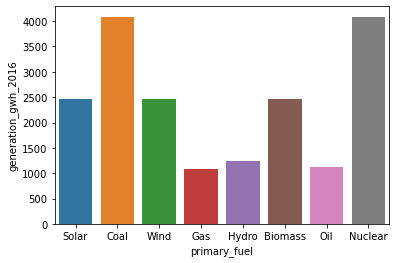

In [348]:
sn.barplot(x="primary_fuel", y="generation_gwh_2016", data=df1,ci=None)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

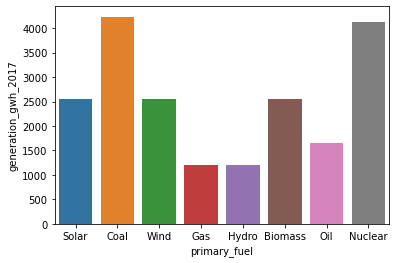

In [349]:
sn.barplot(x="primary_fuel", y="generation_gwh_2017", data=df1,ci=None)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

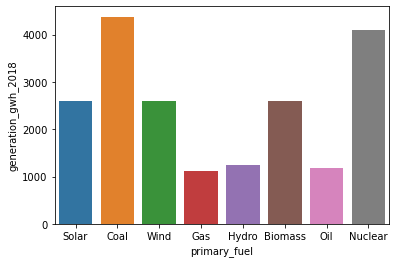

In [350]:
sn.barplot(x="primary_fuel", y="generation_gwh_2018", data=df1,ci=None)

Inference: We have plotted relationship between electricity generation in gigawatt-hours from the year (2014-2018) with Primary Fuel

Nuclear thermal plant and Coal power plant can be seen as majority player in electricity generation

In [351]:
df1.head(1)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [352]:
#now we removed some unnecessary columns from data set 
df1 = df1.drop(['commissioning_year','owner','source','url'],axis='columns')

In [353]:
df1.shape

(907, 10)

### now Encoded object data

In [354]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['primary_fuel'] = le.fit_transform(df1['primary_fuel'])
df1['geolocation_source']=le.fit_transform(df1['geolocation_source'])

In [355]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [356]:
#Finding the correlation values
cor=df1.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,-2.966463e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,2.904016e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,8.066490e-17,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,-1.048582e-17,8.849556e-01,9.234611e-01,9.571589e-01,9.826888e-01,1.000000e+00


<AxesSubplot:>

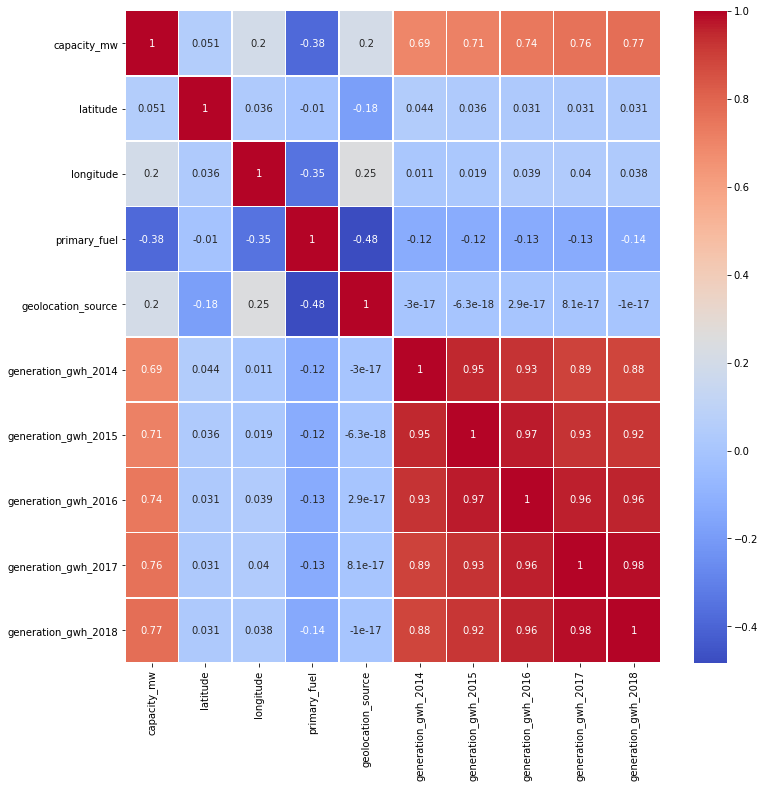

In [357]:
#Plotting heatmap
corr_matrix=df1.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

electrical generating capacity(capacity_mw) is showing positive correlation with electricity generation for different years.

Primary fuel and Capacity_mw is showing good positive correlation.


### Removing the outliers

In [358]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
new_df=df1[(z<3).all(axis=1)]

In [359]:
df1.shape

(907, 10)

In [360]:
new_df.shape

(868, 10)

In [361]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

4.299889746416759

Data loss percentage is less than 4.51 percentage so it feasiable to use z_score

### Checking for skewness

In [362]:
numericals=list(new_df.select_dtypes(['float64']))

In [363]:
numericals

['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [364]:
new_df[numericals].skew()

capacity_mw            2.014499
latitude              -0.107280
longitude              0.934259
generation_gwh_2014    1.510294
generation_gwh_2015    1.381102
generation_gwh_2016    1.405299
generation_gwh_2017    1.273059
generation_gwh_2018    1.311960
dtype: float64

In [365]:
# using power transformer method for rwmoving skewness
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[numericals]=scaler.fit_transform(new_df[numericals].values)

In [366]:
new_df[numericals].skew()

capacity_mw            0.018337
latitude              -0.072507
longitude             -0.001756
generation_gwh_2014   -0.253543
generation_gwh_2015   -0.312867
generation_gwh_2016   -0.314508
generation_gwh_2017   -0.345349
generation_gwh_2018   -0.354918
dtype: float64

In [367]:
new_df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683241,1.157848,-0.940678,6,1,0.343569,0.371618,0.374837,0.375620,0.389637
1,0.245148,0.593792,-0.520737,1,2,0.343569,0.371618,0.374837,0.375620,0.389637
2,-0.254916,0.124517,-2.381446,7,2,0.343569,0.371618,0.374837,0.375620,0.389637
3,0.417964,0.446724,2.432021,2,2,-1.021481,-0.710634,-0.662721,-0.883716,-0.906993


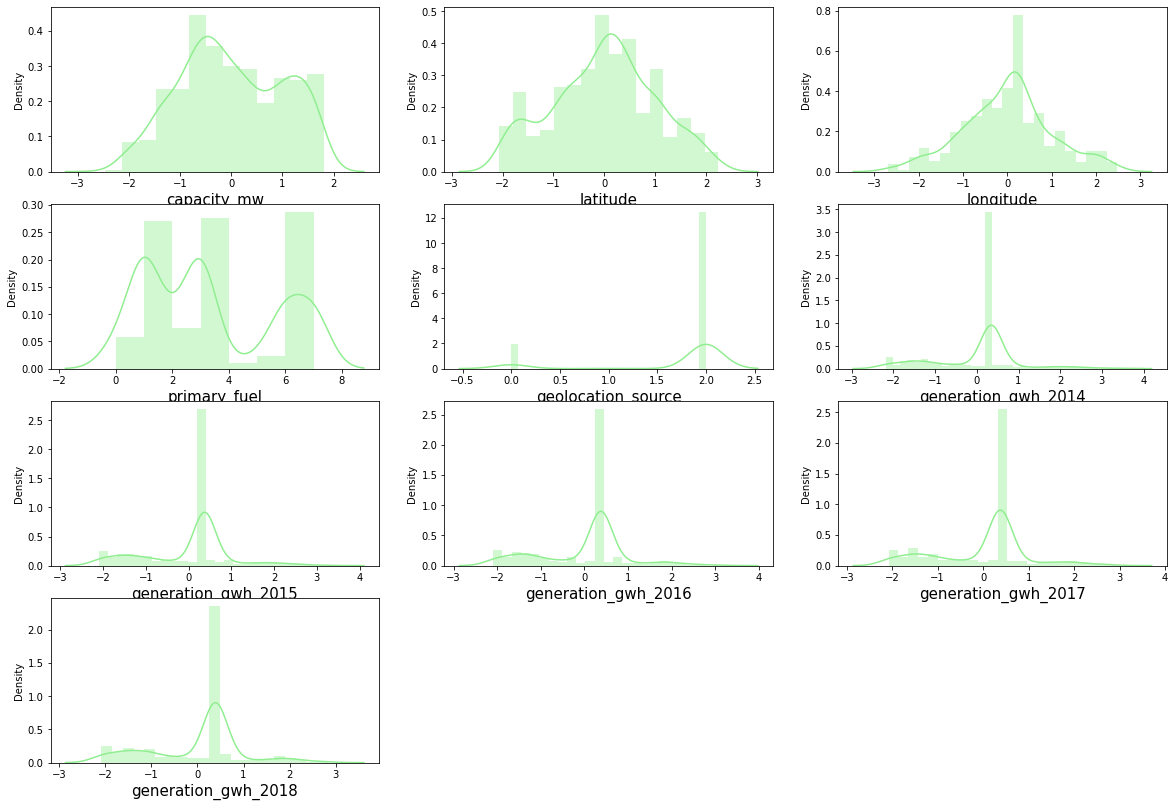

In [369]:
#Checking Data Distrubution again
plt.figure(figsize =(20,90))
pltnum = 1
for i in new_df:
    if pltnum <= 10:
        plt.subplot(25,3,pltnum)
        sns.distplot(new_df[i],color = 'lightgreen')
        plt.xlabel(i,fontsize= 15)
    pltnum+=1
plt.show()


## Task 1: To Predict the Capacity_mw
#### Splitting the data into input and target variables

In [368]:
x = new_df.drop(['capacity_mw'], axis = 1)
y=new_df['capacity_mw']

In [384]:
# Splitting the dataset into trianing and testing data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [375]:
#Finding the best random state

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
rs = 0
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 369


In [376]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=rs)

In [377]:
# Linear Regressor Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.3559011327953775
Mean absolute error :  0.6653096223132315
Mean Squared error : 0.6021983637755571
Cross validation score is  0.33912294123384745


In [378]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.6146437717470552
Mean absolute error :  0.4555622538858593
Mean Squared error : 0.36028768554086044
Cross validation score is  0.5946022653938039


In [379]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.88795672415617
Mean absolute error :  0.21635290036492538
Mean Squared error : 0.10475453508874545
Cross validation score is  0.6438457008701647


In [380]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.7934579378029755
Mean absolute error :  0.3127511965721364
Mean Squared error : 0.19310590072247977
Cross validation score is  0.7820098076099471


In [381]:
# Creting dataframe to store accuracy,f1 score and cv score of all the models.
model=['Linear Regression','Support Vector Regressor',' K Nearest Neighbors regression','Random Forest Regressor']

acc=[lr_score*100,svr_score*100,knn_score*100,rfr_score*100]

cv_score=[lr_cv*100,svr_cv*100,knn_cv*100,rfr_cv*100]


diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],acc[3]-cv_score[3]]
diff
result=pd.DataFrame({'Model':model,'R2_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,R2_score,Cross Validation_score,Difference
0,Linear Regression,35.590113,33.912294,1.677819
1,Support Vector Regressor,61.464377,59.460227,2.004151
2,K Nearest Neighbors regression,88.795672,64.384570,24.411102
3,Random Forest Regressor,79.345794,78.200981,1.144813


### Choosing the Model
#### I am going to choose the Random Forest Regressor as best model because it is giving highest R2 score approximately 84 and least difference of 5 between R2 and Cross validation score


### Applying hyperparameter to the best accuracy model

In [382]:
parameters= {
    'n_estimators': [70,100],
    'max_depth': [5,10,18],
    'min_samples_split':[2,3,4],
    'criterion':['mse', 'mae'],
    }

In [385]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [386]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 10, 18],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [70, 100]})

In [387]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 70}

In [388]:
Final_model=RandomForestRegressor(n_estimators=70,criterion='mae',max_depth=10,min_samples_split=2)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score*100)
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)

R2 score from Random Forest regression is 79.34579378029754
Mean absolute error :  0.3127511965721364


### Saving the model

In [390]:
import joblib
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']

## Task 2 : Predicting Primary Fuel Type

In [396]:
new_df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683241,1.157848,-0.940678,6,1,0.343569,0.371618,0.374837,0.375620,0.389637
1,0.245148,0.593792,-0.520737,1,2,0.343569,0.371618,0.374837,0.375620,0.389637
2,-0.254916,0.124517,-2.381446,7,2,0.343569,0.371618,0.374837,0.375620,0.389637
3,0.417964,0.446724,2.432021,2,2,-1.021481,-0.710634,-0.662721,-0.883716,-0.906993


In [397]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [398]:
df1['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Encoded values for fuel type fields are as follows:-
Biomass-0, Coal-1, Gas-2, Hydro-3, Nuclear-4, Oil-5, Solar-6, Wind-7

In [399]:
new_df.shape

(868, 10)

In [400]:
# selecting target and feature sapereately.
x = new_df.drop(['primary_fuel'], axis = 1)
y=new_df['primary_fuel']

### Model Building

In [406]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [407]:
# Creating X_train,X_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=rs)

In [408]:
models=[DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        GradientBoostingClassifier()
        ]


for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"accuracy_score", accuracy_score(y_test,pred))

DecisionTreeClassifier() accuracy_score 0.6704980842911877
RandomForestClassifier() accuracy_score 0.7318007662835249
SVC() accuracy_score 0.632183908045977
GradientBoostingClassifier() accuracy_score 0.7509578544061303


In [415]:
for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print('\n',models[model],"\nconfusion_matrix\n\n",confusion_matrix(y_test,pred))


 DecisionTreeClassifier() 
confusion_matrix

 [[ 7  2  0  2  0  0  0  4]
 [ 3 61  4  9  2  1  0  2]
 [ 0  7 10  7  3  2  0  0]
 [ 2  5  1 48  0  3  0  4]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  1  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 1  2  2  7  0  0  3 14]]

 RandomForestClassifier() 
confusion_matrix

 [[ 9  1  0  2  0  0  0  3]
 [ 3 69  0  7  0  0  0  3]
 [ 0 12  7  8  0  2  0  0]
 [ 2  3  0 56  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  5  0  6  0  0  2 16]]

 SVC() 
confusion_matrix

 [[ 0  0  0  0  0  0  0 15]
 [ 0 61  0 15  0  0  0  6]
 [ 0  7  1 19  0  1  0  1]
 [ 0  4  0 49  0  0  0 10]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  1  0  1  0  2]
 [ 0  3  0  0  0  0 32  0]
 [ 0  6  0  2  0  0  0 21]]

 GradientBoostingClassifier() 
confusion_matrix

 [[ 7  2  0  2  0  0  0  4]
 [ 2 69  0  5  0  1  0  5]
 [ 0  5 12 10  0  2  0  0]
 [ 2  4  0 54  0  0  0  3]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 0  1  0  0 

In [416]:
for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"classification_report\n",classification_report(y_test,pred))

DecisionTreeClassifier() classification_report
               precision    recall  f1-score   support

           0       0.42      0.33      0.37        15
           1       0.75      0.74      0.75        82
           2       0.59      0.45      0.51        29
           3       0.65      0.76      0.70        63
           4       0.00      0.00      0.00         3
           5       0.25      0.40      0.31         5
           6       0.92      1.00      0.96        35
           7       0.57      0.45      0.50        29

    accuracy                           0.68       261
   macro avg       0.52      0.52      0.51       261
weighted avg       0.67      0.68      0.67       261

RandomForestClassifier() classification_report
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.76      0.83      0.80        82
           2       0.78      0.24      0.37        29
           3       0.69      0.87   

### Checking Cross Validation Score
#### Here we check cross validation score to find the best classification model

In [417]:
from sklearn.model_selection import cross_val_score

In [418]:
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    print("Cross Validation Score for",models[model],scr.mean())

Cross Validation Score for DecisionTreeClassifier() 0.70157464620291
Cross Validation Score for RandomForestClassifier() 0.7649790711580626
Cross Validation Score for SVC() 0.6705069430602617
Cross Validation Score for GradientBoostingClassifier() 0.7419573450269085


#### Minimum difference in accuracy and cross validation score is for RandomForestClassifier. So RandomForestClassifier is our best model.

### Hyper Tuning the Model

In [419]:
parameters= {
    'n_estimators': [70,100],
    'max_depth': [18,20,22],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini', 'entropy'],
    }

In [421]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [422]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 20, 22],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 100]})

In [423]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'sqrt',
 'n_estimators': 70}

Accuracy of the model using Random Forest classifier is  73.9463601532567
F1 Score is  71.2517718008007
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.74      0.83      0.78        82
           2       0.83      0.17      0.29        29
           3       0.68      0.86      0.76        63
           4       0.00      0.00      0.00         3
           5       0.50      0.40      0.44         5
           6       0.95      1.00      0.97        35
           7       0.74      0.69      0.71        29

    accuracy                           0.74       261
   macro avg       0.63      0.57      0.57       261
weighted avg       0.74      0.74      0.71       261

-------------------------------

 Confusion Matrix


<AxesSubplot:>

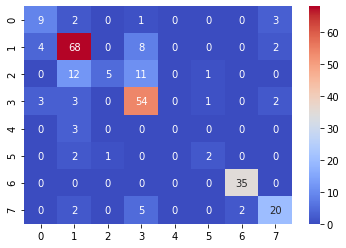

In [424]:
Final_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features='sqrt',max_depth=22)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Random Forest classifier is ",acc_final*100)
f1_final=f1_score(y_test,pred,average='weighted')
print("F1 Score is ",f1_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Saving the model

In [425]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [426]:
joblib.dump(Final_model,'Final_Model_2.pkl')

['Final_Model_2.pkl']